### 1) Perform sentimental analysis on the Elon-musk tweets (Elon-musk.csv)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import tweepy as twt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Elon_musk.csv",engine="python")

In [6]:
data.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
len(data.index)

1999

In [8]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (data.Text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')



In [10]:
words_data

,Frequency
Word,
�,408
&amp;,216
@erdayastronaut,140
@spacex,138
@ppathole,123
...,...
@thebabylonbee,7
sn9,7
@johnnacrider1,7


In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


###  using the VADER Sentiment Analyzer in order to perform the sentiment analysis. 


In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Text(0, 0.5, 'Count')

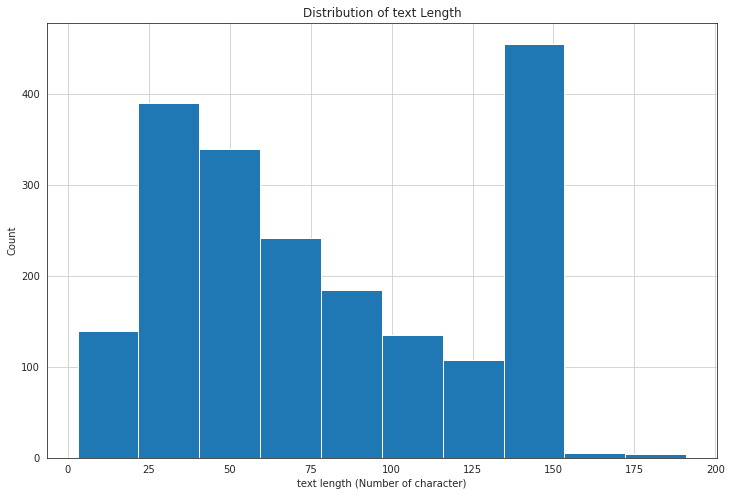

In [13]:
text_length = data["Text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [14]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['Text']= data['Text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [15]:
## removing punctuation from review..#
import string
data['Text']=data['Text'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [16]:
## Remove Numbers from tweets...##
data['Text']=data['Text'].str.replace('[0-9]','')

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words=stopwords.words('english')

In [19]:
data['Text']=data['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [20]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [21]:
data.head(5)

,Unnamed: 0,Text
0,1,kunalb i�m alien
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,joerogan spotify great interview
3,4,gtera doge underestimated
4,5,teslacn congratulations tesla china amazing ex...


In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from textblob import Word
data['Text']= data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [24]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Text']= data['Text'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [25]:
text_set=data['Text']

In [26]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)

In [27]:
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [28]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Text'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aber  able  abo  aboard  ...  zshauladventure  zubinanary  zwiebelbach  zzcool
0        0     0    0       0  ...                0           0            0       0
1        0     0    0       0  ...                0           0            0       0
2        0     0    0       0  ...                0           0            0       0
3        0     0    0       0  ...                0           0            0       0
4        0     0    0       0  ...                0           0            0       0
...    ...   ...  ...     ...  ...              ...         ...          ...     ...
1994     0     0    0       0  ...                0           0            0       0
1995     0     0    0       0  ...                0           0            0       0
1996     0     0    0       0  ...                0           0            0       0
1997     0     0    0       0  ...                0           0            0       0
1998     0     0    0       0  ...                0           0  

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Text'])
print(TFIDF)

  (0, 113)	0.6623688405640785
  (0, 2684)	0.7491778954626188
  (1, 4547)	0.3503086432516702
  (1, 3149)	0.39490911009737484
  (1, 1649)	0.4162521748644735
  (1, 890)	0.35842289988597426
  (1, 4524)	0.4162521748644735
  (1, 3622)	0.4162521748644735
  (1, 2417)	0.2703073340188711
  (2, 2534)	0.5043290017718325
  (2, 1581)	0.3080284702583498
  (2, 4133)	0.5704255952716918
  (2, 2606)	0.5704255952716918
  (3, 4649)	0.6108339384056402
  (3, 1050)	0.5037497388423235
  (3, 1599)	0.6108339384056402
  (4, 1242)	0.2876711653018475
  (4, 3148)	0.27277696499630993
  (4, 4935)	0.24937628204523501
  (4, 2705)	0.32114907525749786
  (4, 1270)	0.4094092137495757
  (4, 141)	0.3260835812455286
  (4, 652)	0.3525306208428504
  (4, 4360)	0.1828625922881543
  (4, 775)	0.3260835812455286
  :	:
  (1994, 147)	0.13917721113851475
  (1994, 4555)	0.2117618765707303
  (1994, 1394)	0.16274369098951297
  (1995, 21)	0.4008409077440879
  (1995, 688)	0.4008409077440879
  (1995, 4355)	0.36570555829866774
  (1995, 764)	0.

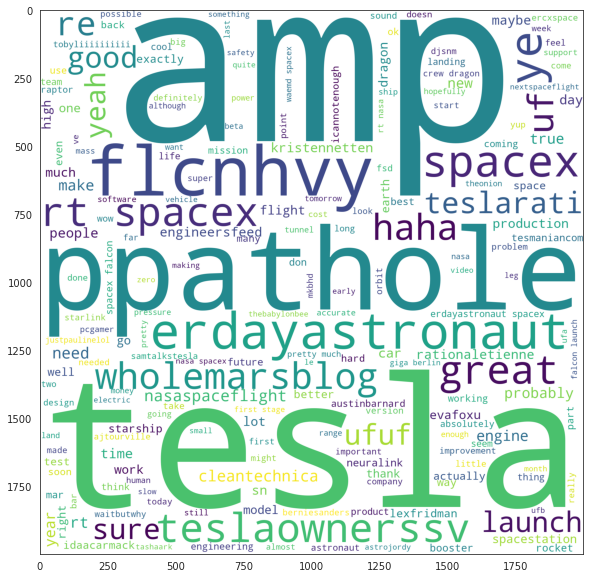

In [30]:
Review_wordcloud = ' '.join(data['Text'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [31]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[0:20]
freq

spacex             237
amp                216
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 85
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
launch              55
nasaspaceflight     55
haha                55
it�s                54
uf                  53
good                52
year                48
sure                43
dtype: int64

In [32]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
from textblob import TextBlob
data['polarity'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Text','polarity']].head(5)

,Text,polarity
0,kunalb i�m alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [34]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Unnamed: 0,Text,polarity
2,3,joerogan spotify great interview,0.800000
4,5,teslacn congratulation tesla china amazing exe...,0.200000
5,6,happy new year ox httpstcowfkmyuoj,0.468182
7,8,owensparks flcnhvy anonyx haha thanks,0.200000
9,10,entertaining outcome likely,0.250000


In [35]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [36]:
sent_type(data['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [37]:
data["category"]=data['polarity']

data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

data["category"]=data["category"].astype('category')
data.dtypes

Unnamed: 0       int64
Text            object
polarity       float64
category      category
dtype: object

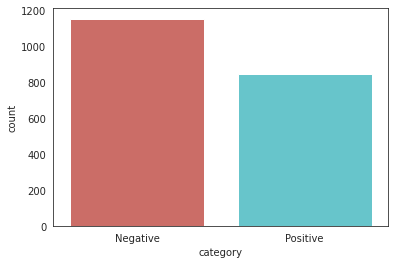

In [38]:
sns.countplot(x='category',data=data,palette='hls')

In [39]:
data.category.value_counts(normalize=True).mul(100)

Negative    57.678839
Positive    42.321161
Name: category, dtype: float64

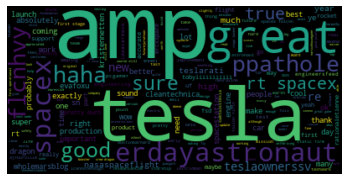

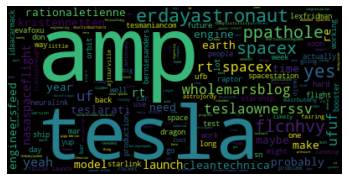

In [40]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Text.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Text.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()


### Conclusion:-We have created work cloud on he is used in his tweet varies frequently that words are amp,great,tesla,spacex and according to sentiment probability the used 58% negative word & 42% positive word
 